# External modules

In [1]:
library(tidyverse)
library(readr)
library(DescTools)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Internal functions

In [2]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift




In [29]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [3]:
n <- 10000

loc <- 0
scale <- 1
shape <- 0.01

x <- generate_gev_sample(n = n, loc = loc, scale = scale, shape = shape)


# EDA

------------------------------------------------------------------------------ 
x (numeric)

         length              n            NAs        unique            0s'
         10'000         10'000              0           = n             0
                        100.0%           0.0%                        0.0%
                                                                         
            .05            .10            .25        median           .75
  -1.1059033775  -0.8440642695  -0.3219660414  0.3796306301  1.2588009276
                                                                         
          range             sd          vcoef           mad           IQR
  12.5488017194   1.2981806710   2.1952636109  1.1451257256  1.5807669690
                                                                         
          mean        meanCI
  0.5913552543  0.5659083004
                0.6168022083
                            
           .90           .95
  2.2710234074  3.029

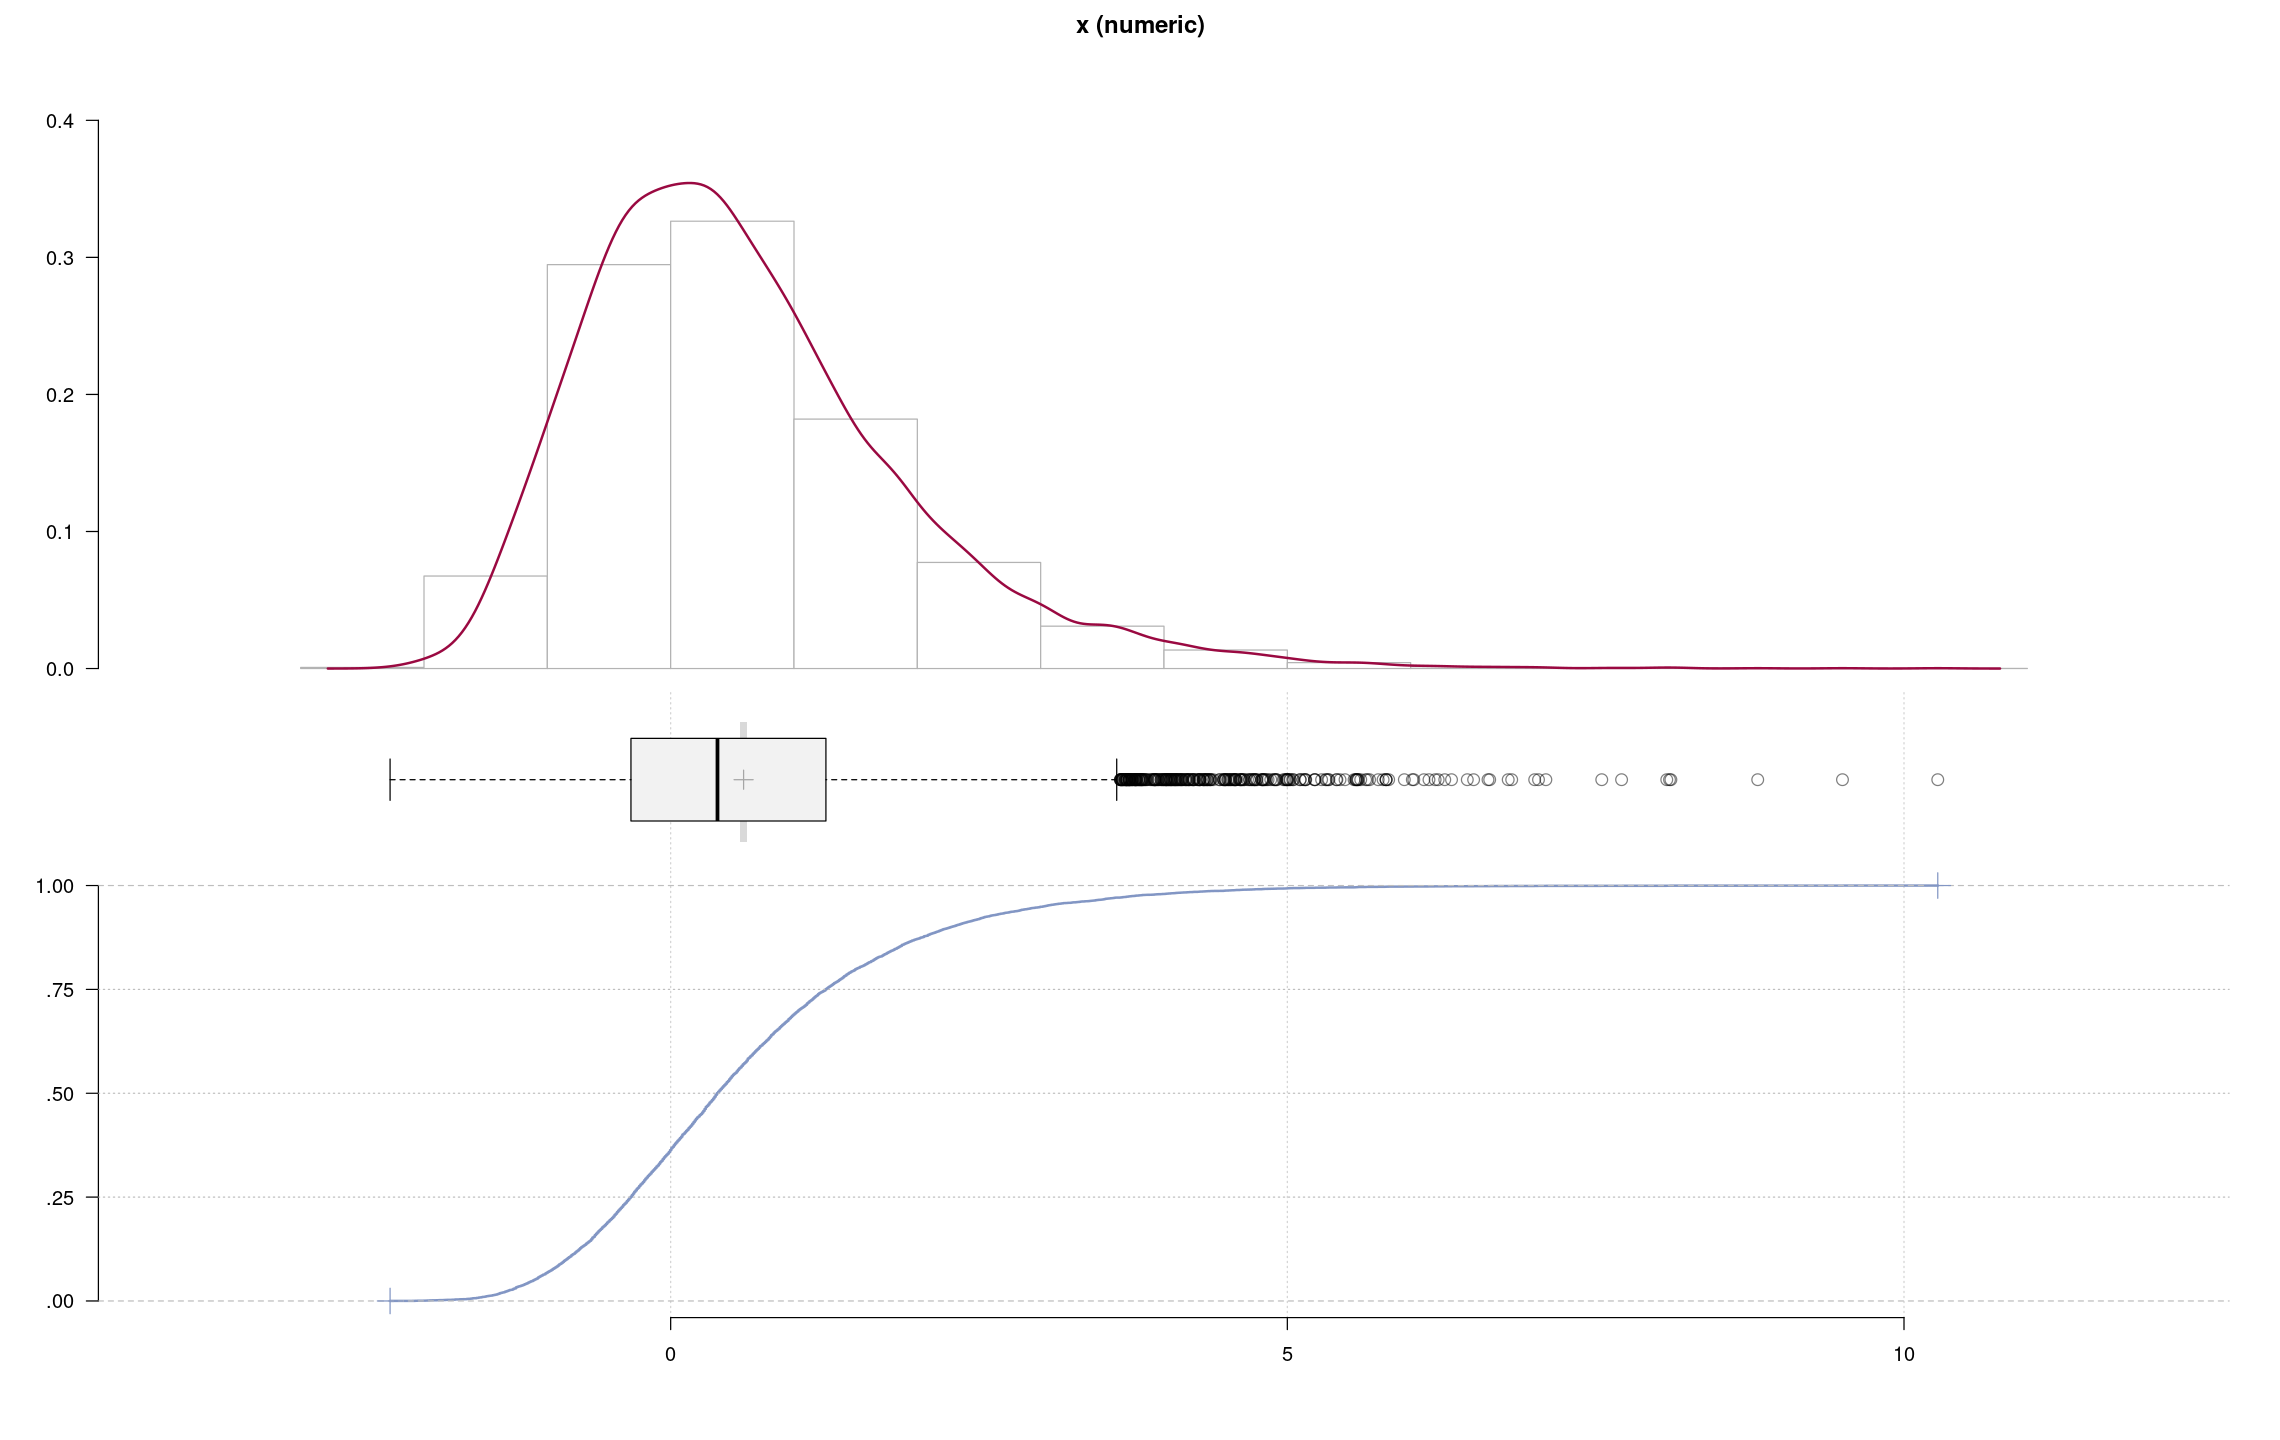

In [4]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

In [32]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# nlargest <- 3000
# y <- extract_nlargest_sample(x, n = nlargest)
# Desc(y)

# Estimation

In [5]:
minimum_block_size <- find_minimum_block_size(x, threshold = NULL)

print(minimum_block_size)

[1] 13


In [8]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x, m = 50)

print(maximum_block_size)

[1] 200


In [6]:
maxima <- extract_block_maxima(x, block_size = minimum_block_size)

print(min(maxima))

[1] 0.3822752737


In [ ]:
print(median(x))

In [7]:
print(calculate_mode(x))

[1] 0.1653325457


In [9]:
candidate_block_sizes <- get_candidate_block_sizes(x, threshold = NULL, m = 50)

print(candidate_block_sizes)

  [1]  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30
 [19]  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
 [37]  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
 [55]  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
 [73]  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 [91] 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
[109] 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
[127] 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
[145] 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
[163] 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
[181] 193 194 195 196 197 198 199 200


In [10]:
gev_mixture_model_object <- fit_stationary_gev_mixture_model(x = x,
                                                             nlargest = Inf,
                                                             block_sizes = NULL,
                                                             minimum_nblocks = 50,
                                                             threshold = NULL,
                                                             confidence_level = 0.95,
                                                             use_extremal_index = TRUE,
                                                             use_uniform_prior = TRUE,
                                                             method = c("MLE", "GMLE", "Lmoments")[1])


In [11]:
print(names(gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "unnormalized_gev_parameters_object"   
[16] "normalized_gev_parameters_object"     
[17] "full_normalized_gev_parameters_object"
[18] "partial_data"                         
[19] "all_data"                             
[20] "selected_model_per_obs"               
[21] "selected_gev_models"                  
[22] "several_residuals"                    
[23] "seve

In [12]:
print(gev_mixture_model_object$full_normalized_gev_parameters_object)

          loc_star   scale_star     shape_star
33   -1.1539524713 1.5768211934 -0.08763875849
73    0.9176425375 0.6970853312  0.06621017409
99   -5.3830248413 3.3155872614 -0.18998537960
105   0.7463140393 0.7472796757  0.05616015354
110   0.5661855872 0.7906634648  0.04879193841
118   1.9740178040 0.4064276496  0.15629419799
121   1.3259265868 0.5867522320  0.09366605558
123   2.1419031861 0.3435101793  0.18803625203
125   1.5709935312 0.5226596942  0.11371041792
130   1.1852116882 0.5931439385  0.09680392765
133   2.1861825670 0.3537814895  0.17902241887
137   1.6189709016 0.5035261489  0.12147530763
142   2.0983410921 0.3734125637  0.16876585502
148   1.7229000401 0.4438677861  0.14651918554
154   1.4530282276 0.5633350779  0.10103949316
155   1.8703494919 0.4344022781  0.14341664335
172   1.0225357500 0.6559300046  0.07969908092
173   2.3766173221 0.3063777979  0.20399896140
178   2.3722631025 0.3337371687  0.18479674278
180   0.8523627140 0.7222196327  0.06078303198
183   2.52524

In [13]:
print(gev_mixture_model_object$weights)

            33             73             99            105            110 
0.001603849238 0.055132317562 0.004009623095 0.095829991981 0.057337610265 
           118            121            123            125            130 
0.038291900561 0.027866880513 0.051323175621 0.028668805132 0.151162790698 
           133            137            142            148            154 
0.001403368083 0.024659182037 0.007818765036 0.079390537289 0.033680834002 
           155            172            173            178            180 
0.022052927025 0.090016038492 0.035284683240 0.012028869286 0.017842822775 
           183            189            196 
0.151563753007 0.012028869286 0.001002405774 


In [37]:
print(which.max(gev_mixture_model_object$weights))

127 
  7 


In [38]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 11


In [39]:
print(which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 13


In [14]:
print(gev_mixture_model_object$information_criteria)

        AIC         BIC 
6382.185514 7038.326488 


In [41]:
print(gev_mixture_model_object$threshold)

[1] 0.8168955155


# Diagnostic

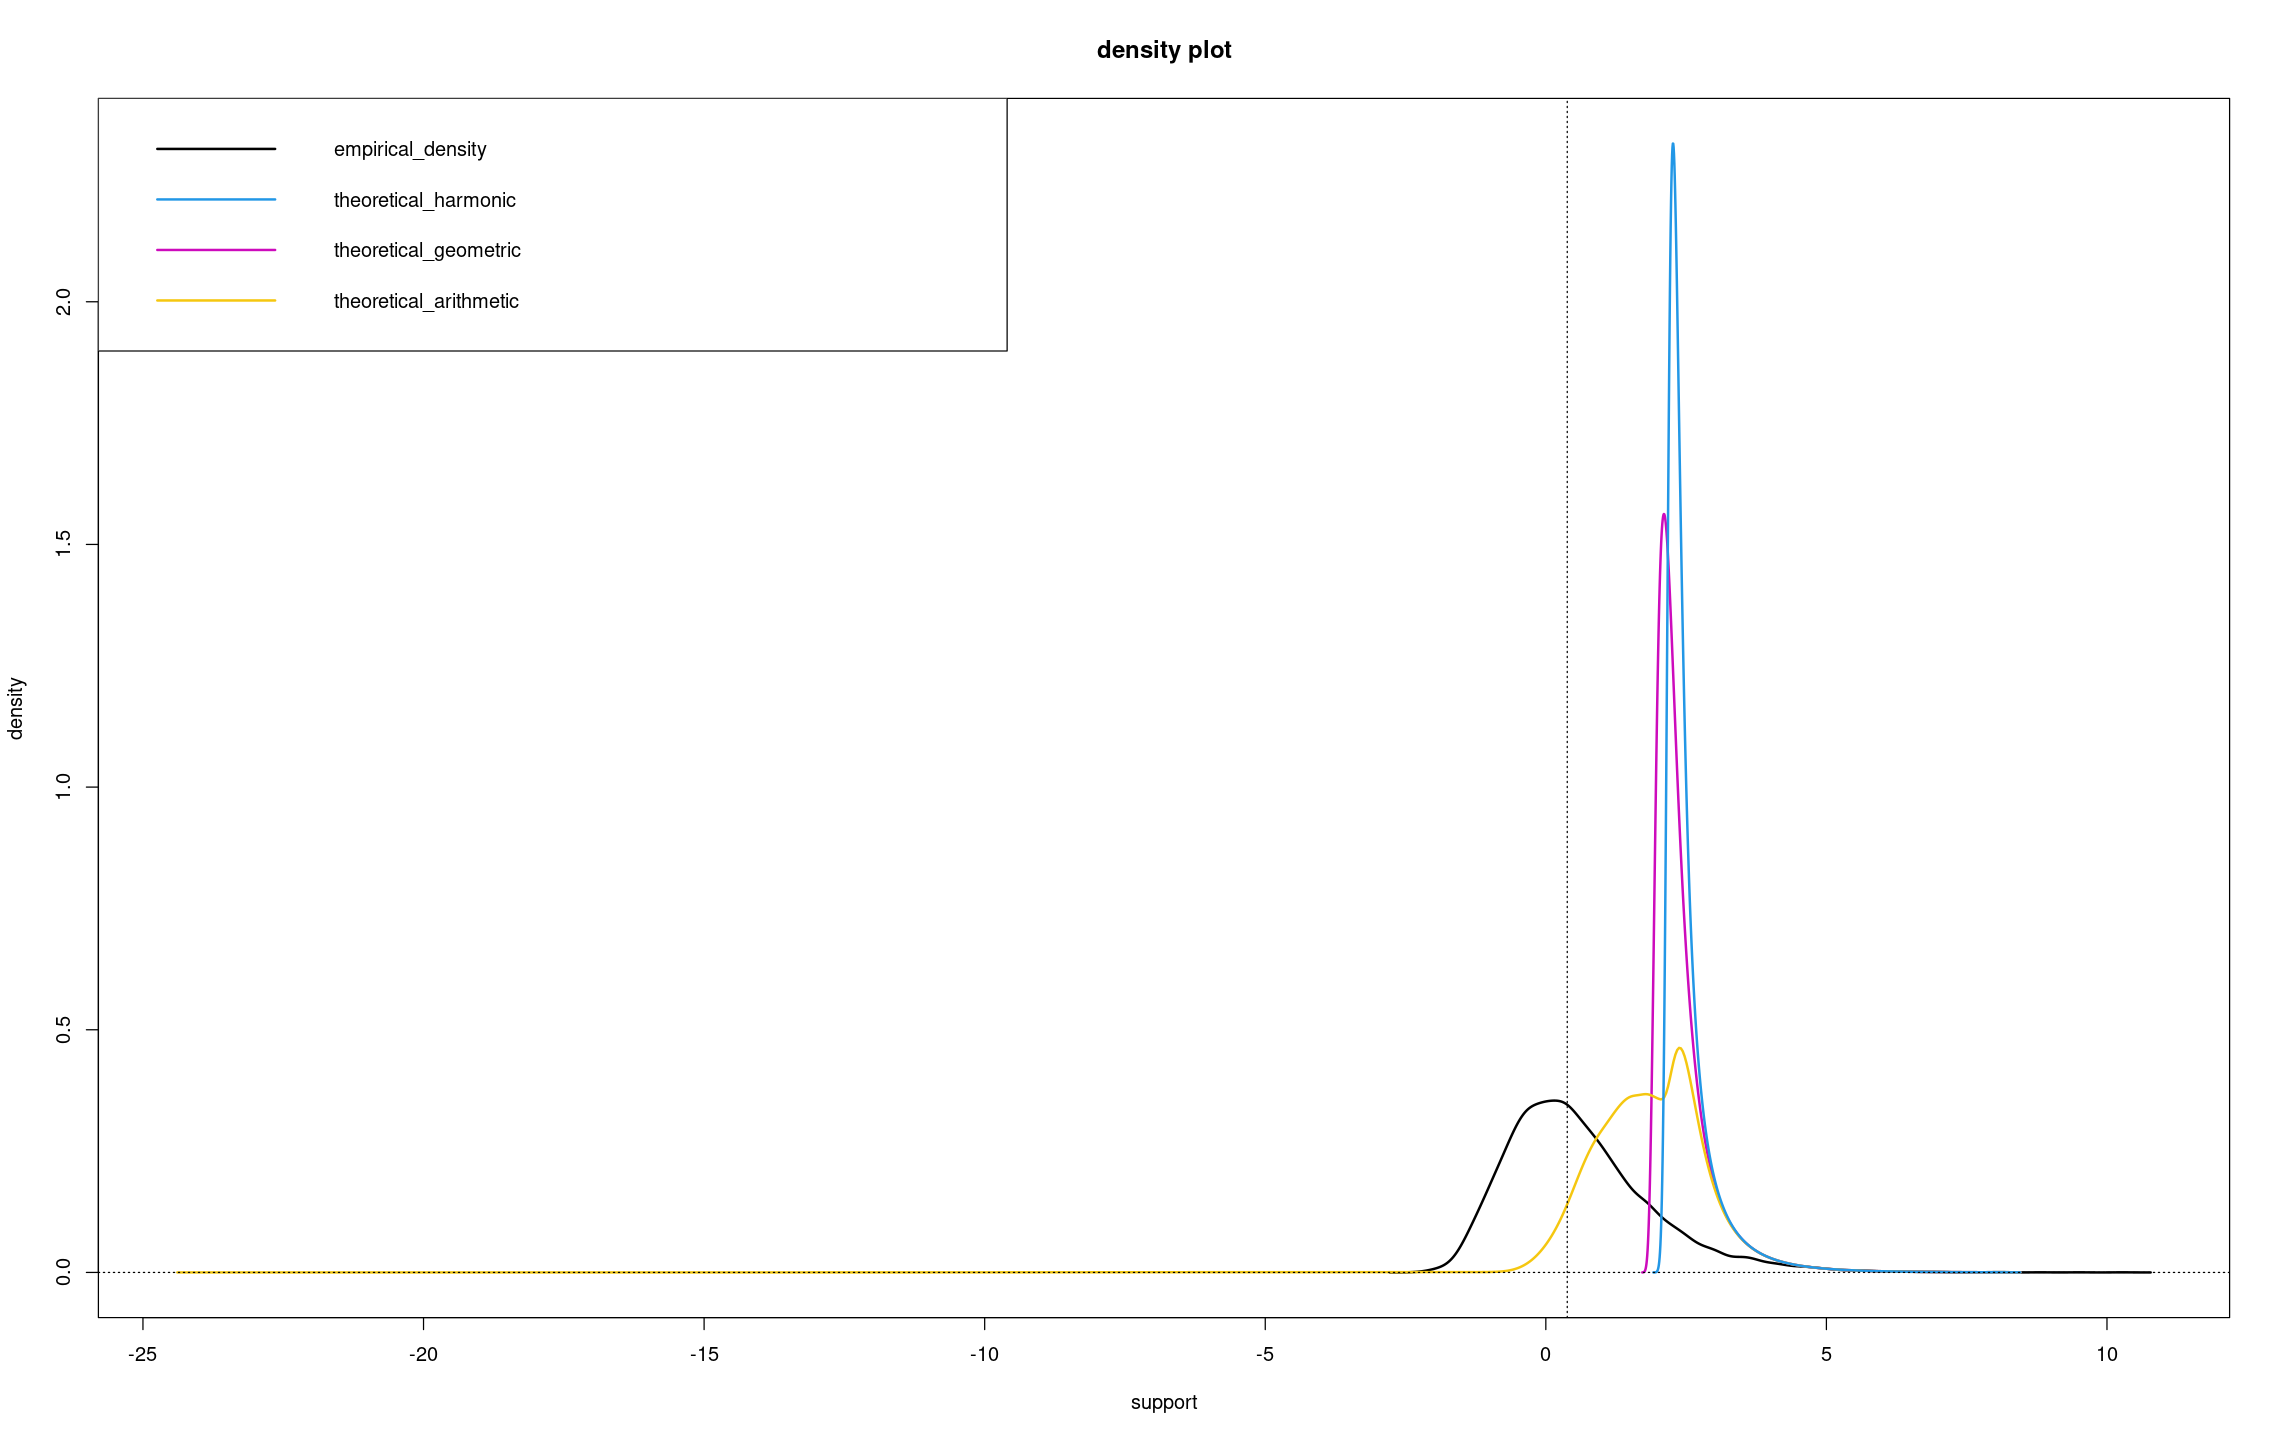

In [16]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = 0,
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topleft")

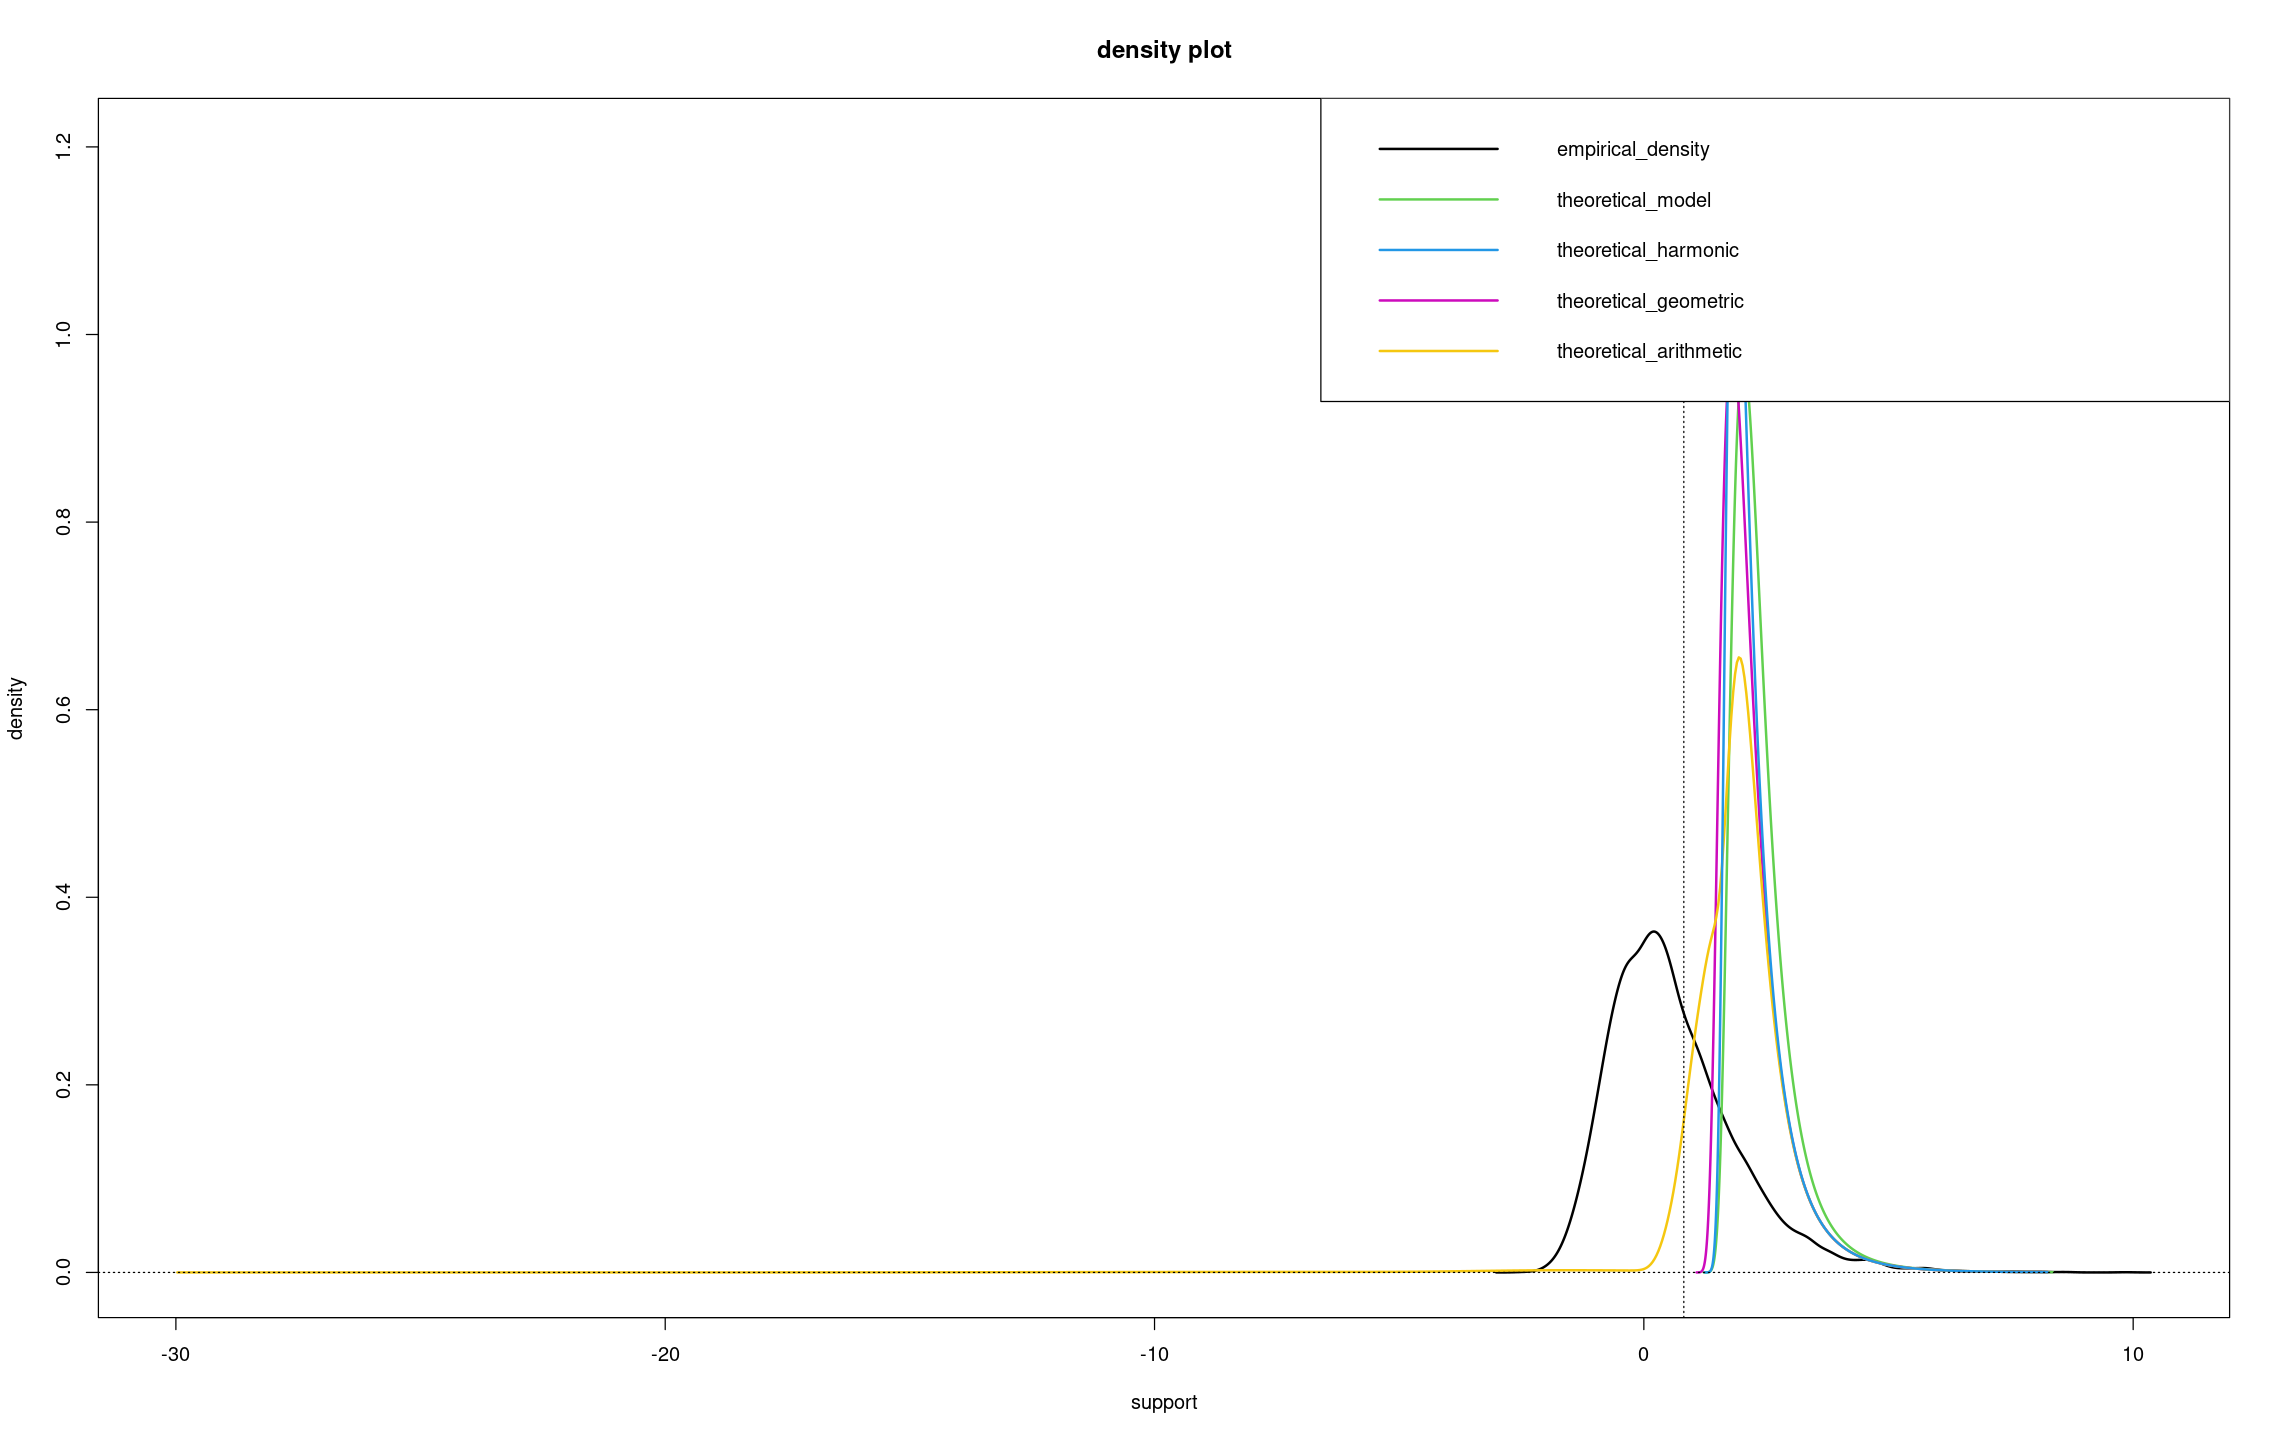

In [43]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$weights),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

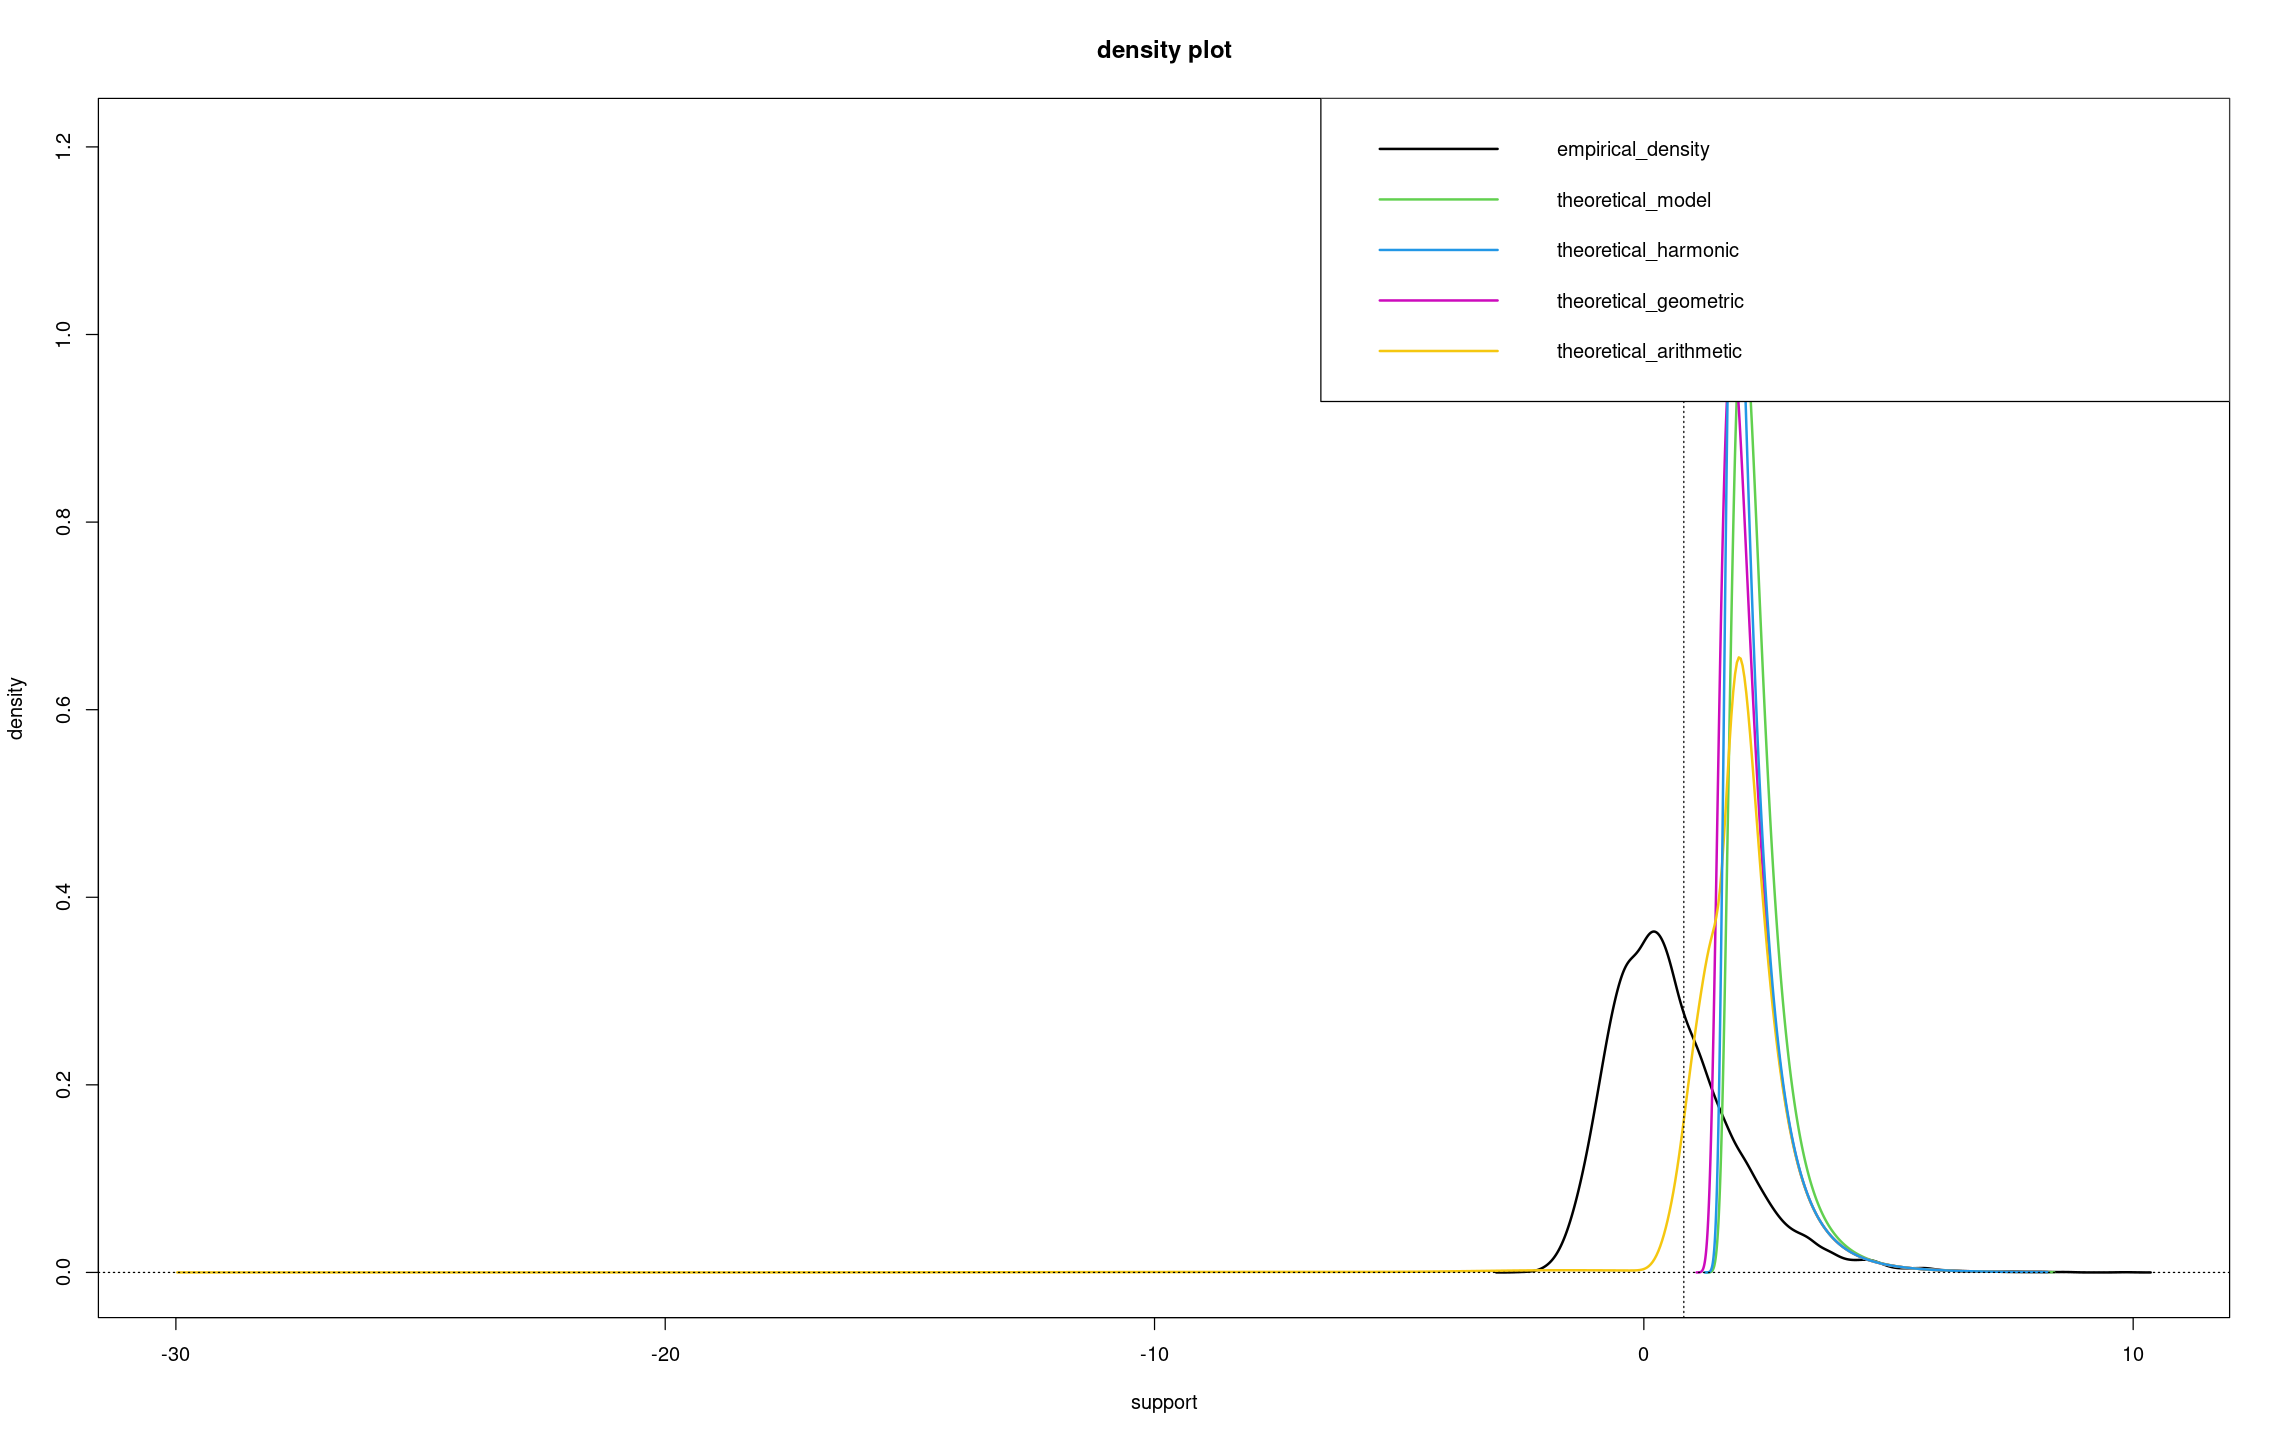

In [44]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

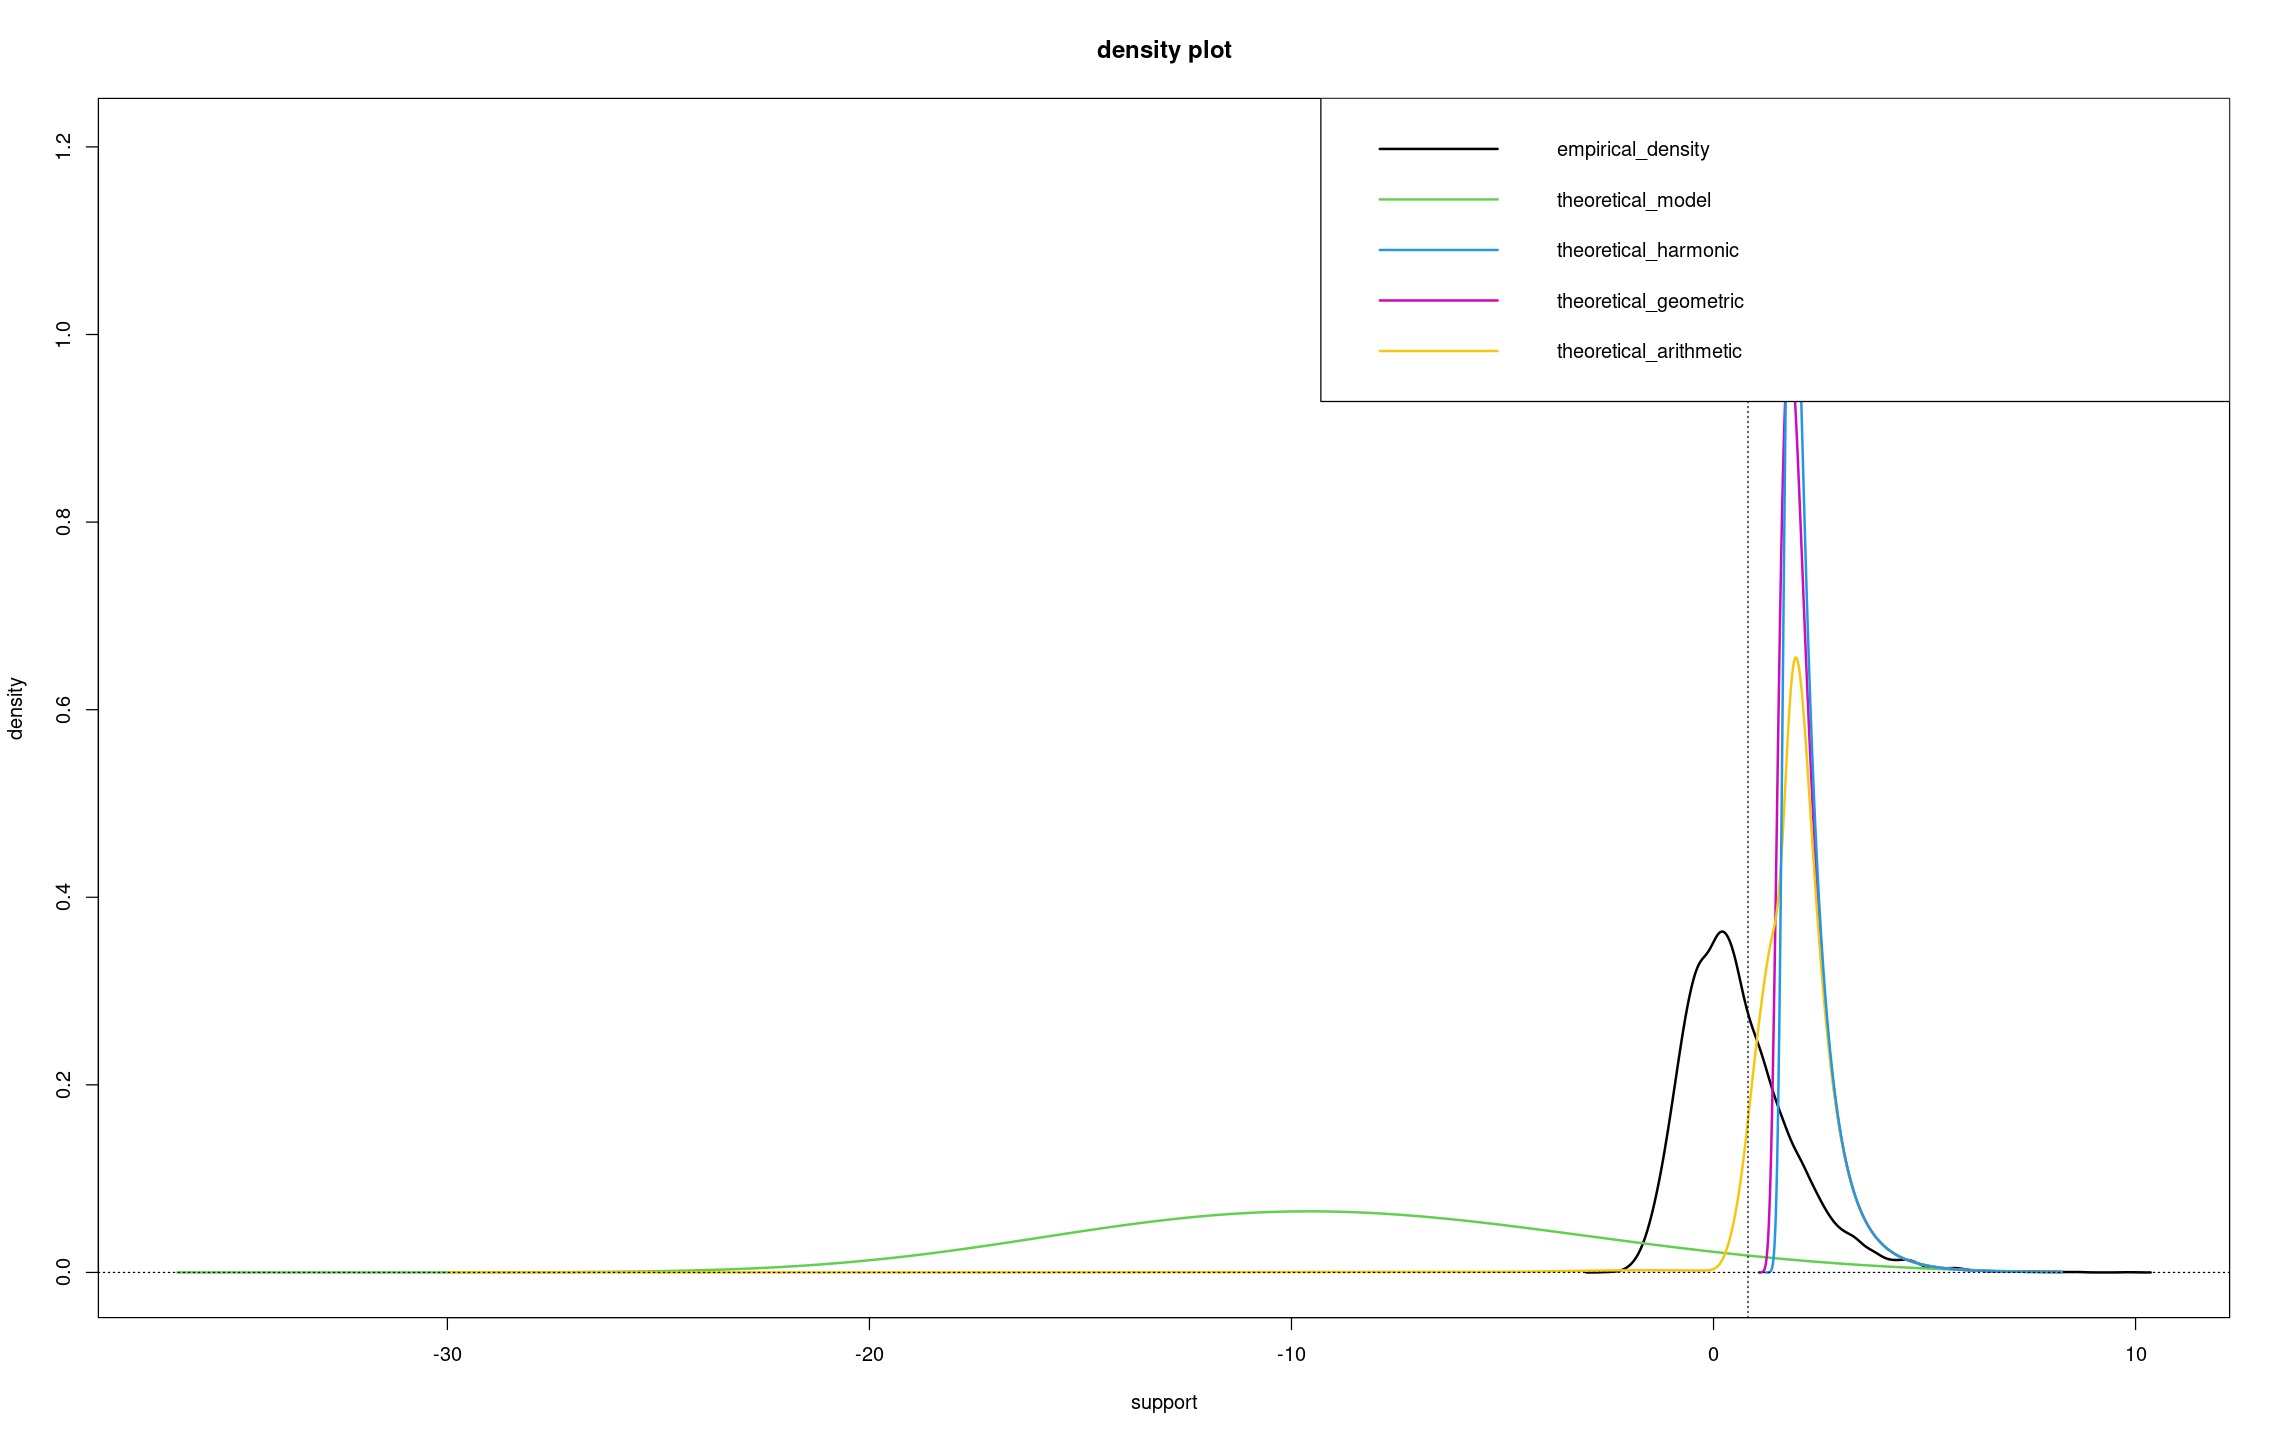

In [46]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

# Quantiles

In [17]:
alpha <- n^(-2)

print(alpha)

[1] 1e-08


In [18]:
true_quantile <- calculate_gev_inverse_cdf(p = 1 - alpha, loc = loc, scale = scale, shape = shape)

print(true_quantile)

[1] 20.22644345


In [19]:
results_geometric <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                    alpha = alpha,
                                                                    do.ci = TRUE,
                                                                    confidence_level = 0.95,
                                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                    iterations = 100)

results_geometric

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
33,8.447001820,13.25780301,18.06860420
73,-7.605519537,26.03789938,59.68131829
99,6.904912145,11.54159892,16.17828569
105,-13.753422948,24.88017434,63.51377162
110,-13.888906315,24.17020995,62.22932621
118,-63.083192229,45.65457302,154.39233827
121,-25.435445579,30.23394374,85.90333306
123,-105.043104482,58.63209716,222.30729881
125,-40.070944893,34.30837103,108.68768696


In [20]:
results_arithmetic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                     iterations = 100)

results_arithmetic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
33,8.447001820,13.25780301,18.06860420
73,-7.605519537,26.03789938,59.68131829
99,6.904912145,11.54159892,16.17828569
105,-13.753422948,24.88017434,63.51377162
110,-13.888906315,24.17020995,62.22932621
118,-63.083192229,45.65457302,154.39233827
121,-25.435445579,30.23394374,85.90333306
123,-105.043104482,58.63209716,222.30729881
125,-40.070944893,34.30837103,108.68768696


In [21]:
results_harmonic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                     iterations = 100)

results_harmonic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
33,8.447001820,13.25780301,18.06860420
73,-7.605519537,26.03789938,59.68131829
99,6.904912145,11.54159892,16.17828569
105,-13.753422948,24.88017434,63.51377162
110,-13.888906315,24.17020995,62.22932621
118,-63.083192229,45.65457302,154.39233827
121,-25.435445579,30.23394374,85.90333306
123,-105.043104482,58.63209716,222.30729881
125,-40.070944893,34.30837103,108.68768696


In [52]:
options(repr.plot.width=23, repr.plot.height=6)

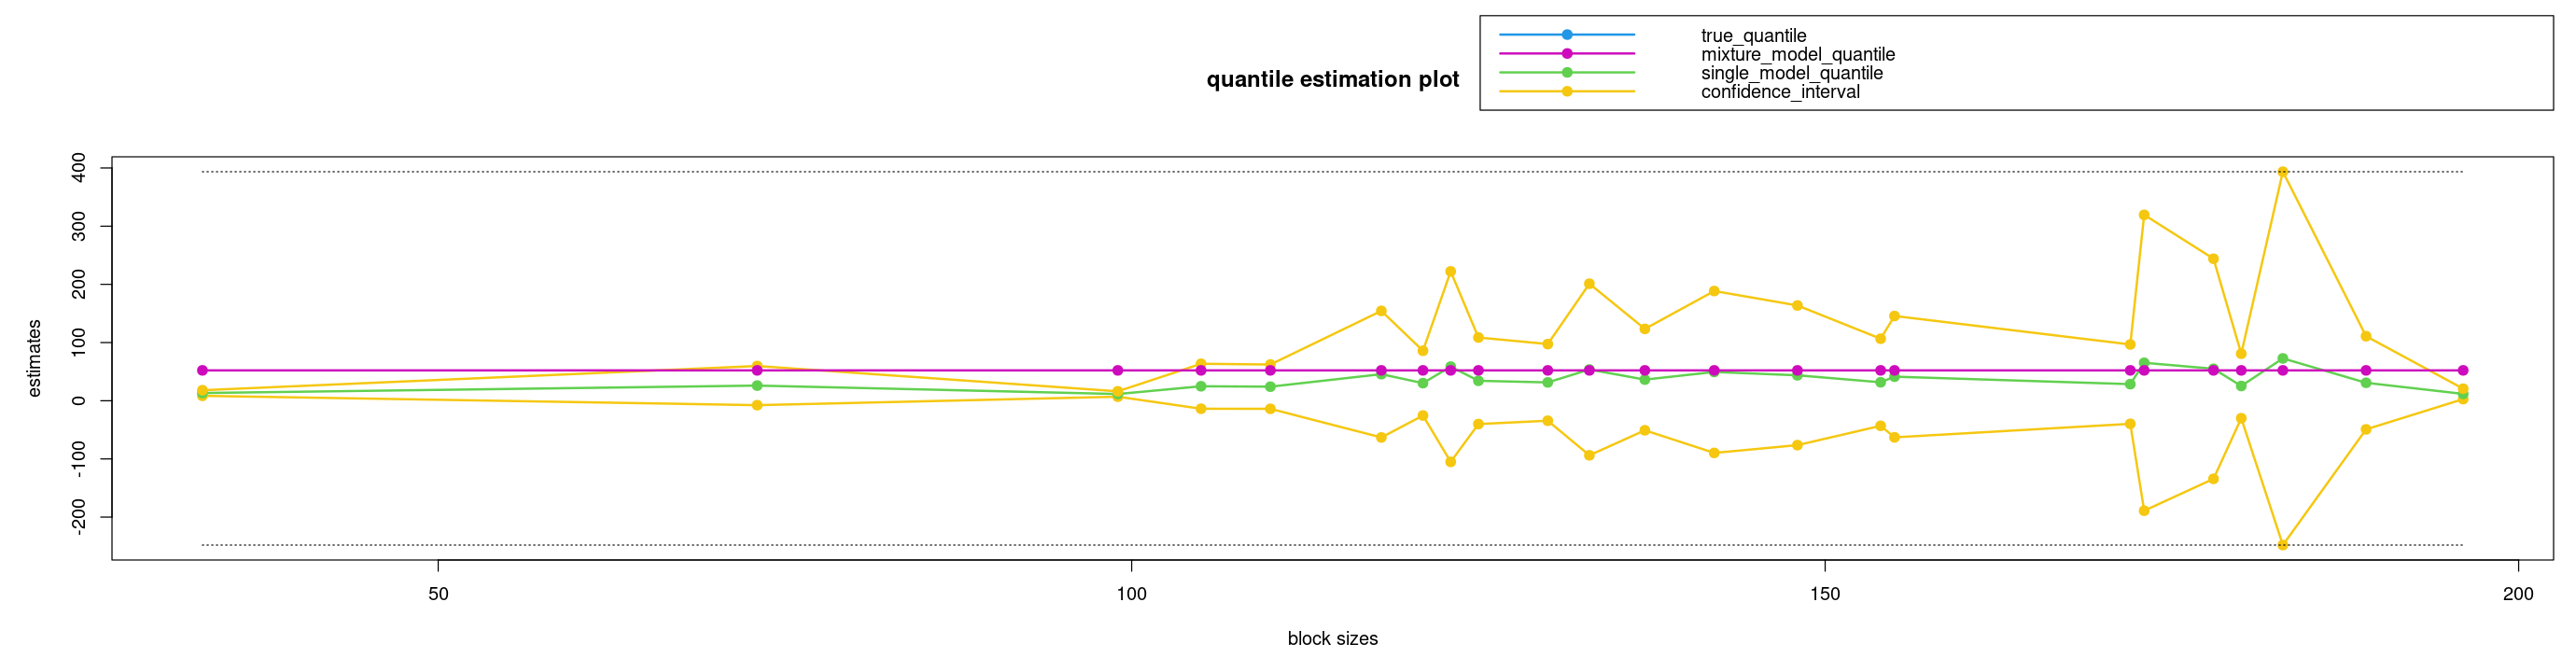

In [22]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = NULL,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")

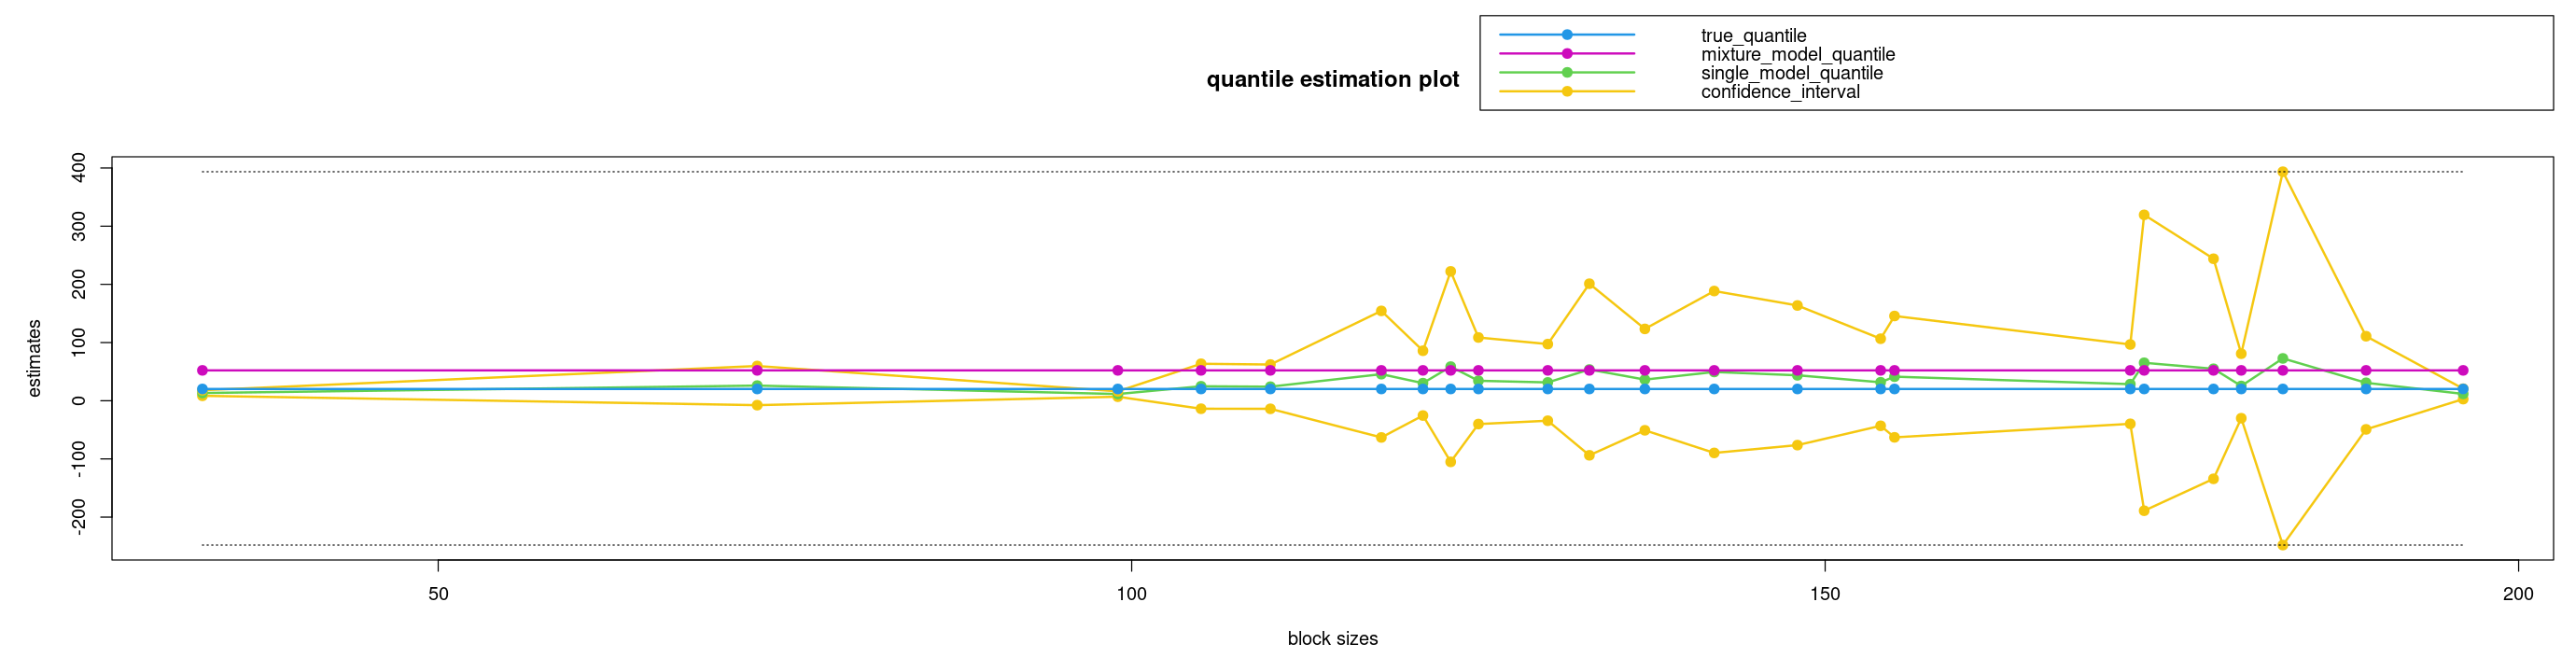

In [23]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = true_quantile,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")
